In [1]:
import pandas as pd
import yfinance as yf
from webapp.fincalc.portfolio_analytics import calculate_stock_volatility, check_volatility_signal
import numpy as np
import matplotlib.ticker as mticker # For formatting y-axis as percentage
import numpy
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.dates as mdates
from mlfinpy.data_structure import standard_bars
from mlfinpy.data_structure import get_time_bars, get_volume_bars, get_dollar_bars, get_tick_bars

In [2]:
# check different bars for q stoks
tickets = ["IONQ", "QUBT", "RGTI", "QMCO"]

In [3]:
ionq_tk = tickets[0]
data_raw = yf.download(ionq_tk, period="30d", interval="1h", progress=False, prepost=True)
data_single_ticker = data_raw.xs(ionq_tk, level=1, axis=1).copy()

YF.download() has changed argument auto_adjust default to True


In [4]:
data_single_ticker

Price,Close,High,Low,Open,Volume
Datetime,,,,,
2025-03-14 08:00:00+00:00,22.05,22.110000,21.570000,22.0000,0
2025-03-14 09:00:00+00:00,22.05,22.140000,21.910000,22.0600,0
2025-03-14 10:00:00+00:00,21.64,22.060000,21.560000,22.0500,0
2025-03-14 11:00:00+00:00,21.90,21.990000,21.580000,21.6400,0
2025-03-14 12:00:00+00:00,22.32,22.420000,21.590000,21.9300,0
...,...,...,...,...,...
2025-04-25 19:30:00+00:00,28.92,28.959999,28.610001,28.6709,1322050
2025-04-25 20:00:00+00:00,28.62,28.970000,28.600000,28.9000,0
2025-04-25 21:00:00+00:00,28.72,28.790000,28.600000,28.6003,0


In [5]:
data_single_ticker

Price,Close,High,Low,Open,Volume
Datetime,,,,,
2025-03-14 08:00:00+00:00,22.05,22.110000,21.570000,22.0000,0
2025-03-14 09:00:00+00:00,22.05,22.140000,21.910000,22.0600,0
2025-03-14 10:00:00+00:00,21.64,22.060000,21.560000,22.0500,0
2025-03-14 11:00:00+00:00,21.90,21.990000,21.580000,21.6400,0
2025-03-14 12:00:00+00:00,22.32,22.420000,21.590000,21.9300,0
...,...,...,...,...,...
2025-04-25 19:30:00+00:00,28.92,28.959999,28.610001,28.6709,1322050
2025-04-25 20:00:00+00:00,28.62,28.970000,28.600000,28.9000,0
2025-04-25 21:00:00+00:00,28.72,28.790000,28.600000,28.6003,0


In [6]:
data_ml = data_single_ticker[['Close', 'Volume']].copy()
data_ml.rename(columns={'Datetime':'date','Close': 'Price', 'Volume': 'Volume'}, inplace=True)


data_ml.head()

Price,Price,Volume
Datetime,,
2025-03-14 08:00:00+00:00,22.05,0
2025-03-14 09:00:00+00:00,22.05,0
2025-03-14 10:00:00+00:00,21.64,0
2025-03-14 11:00:00+00:00,21.90,0
2025-03-14 12:00:00+00:00,22.32,0


In [7]:
data_ml.columns

Index(['Price', 'Volume'], dtype='object', name='Price')

In [8]:
time_bars = get_time_bars(data_ml, resolution="H", num_units=4, verbose=False)


In [9]:
vol_bars = get_volume_bars(data_ml,threshold=2000000, verbose=False)

In [10]:
time_bars

,date_time,tick_num,open,high,low,close,volume,cum_buy_volume,cum_ticks,cum_dollar_value
0,1741953600,5,22.050000,22.050000,21.640000,21.900000,0,0,4,0.000000e+00
1,1741968000,10,22.320000,24.379999,22.320000,23.670000,24787339,20424271,5,5.991203e+08
2,1741982400,14,24.120001,25.020000,24.120001,25.020000,11764379,11764379,4,2.895168e+08
3,1741996800,18,24.860000,25.250000,24.860000,25.250000,0,0,4,0.000000e+00
4,1742212800,22,25.910000,26.000000,25.790000,25.930000,0,0,4,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
114,1745524800,490,28.420000,28.565001,28.360001,28.360001,4393693,947963,4,1.248923e+08
115,1745539200,494,28.490600,28.720000,28.490600,28.720000,0,0,4,0.000000e+00
116,1745582400,498,29.030000,29.030000,28.170000,28.170000,0,0,4,0.000000e+00
117,1745596800,503,28.400000,28.570000,28.334299,28.570000,20137101,14742532,5,5.732718e+08


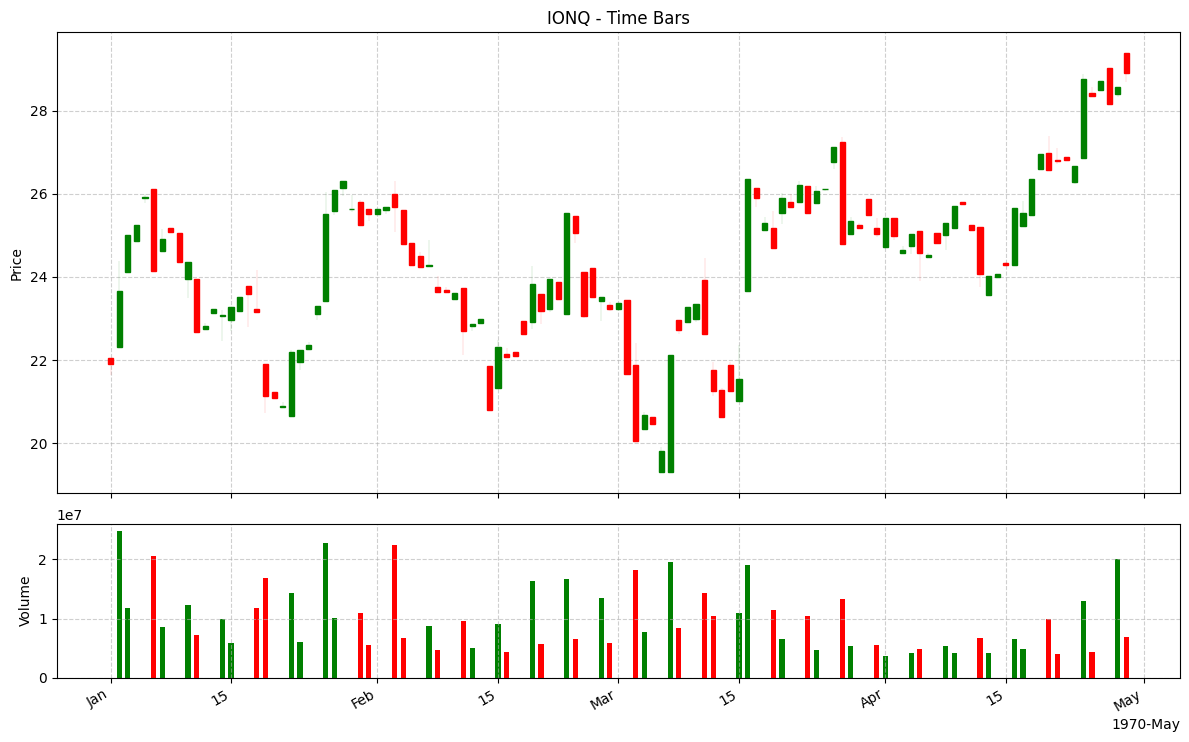

In [11]:
from plotting.utils import plot_bars_matplotlib

plot_bars_matplotlib(time_bars, "Time Bars", ionq_tk)
plt.show() #

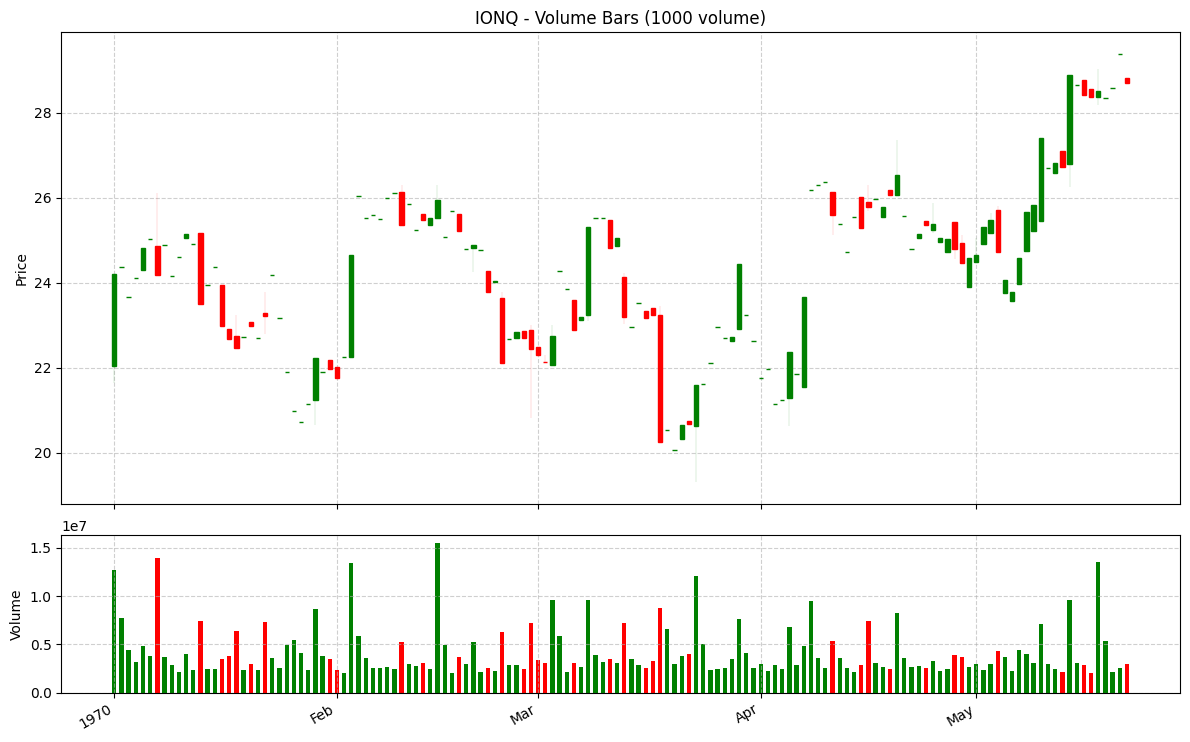

In [12]:
plot_bars_matplotlib(vol_bars, f"Volume Bars ({1000} volume)", ionq_tk)
plt.show()

In [13]:
ticks_bar = get_tick_bars(data_single_ticker, threshold=10)

Reading data in batches:
Batch number: 0
Returning bars 



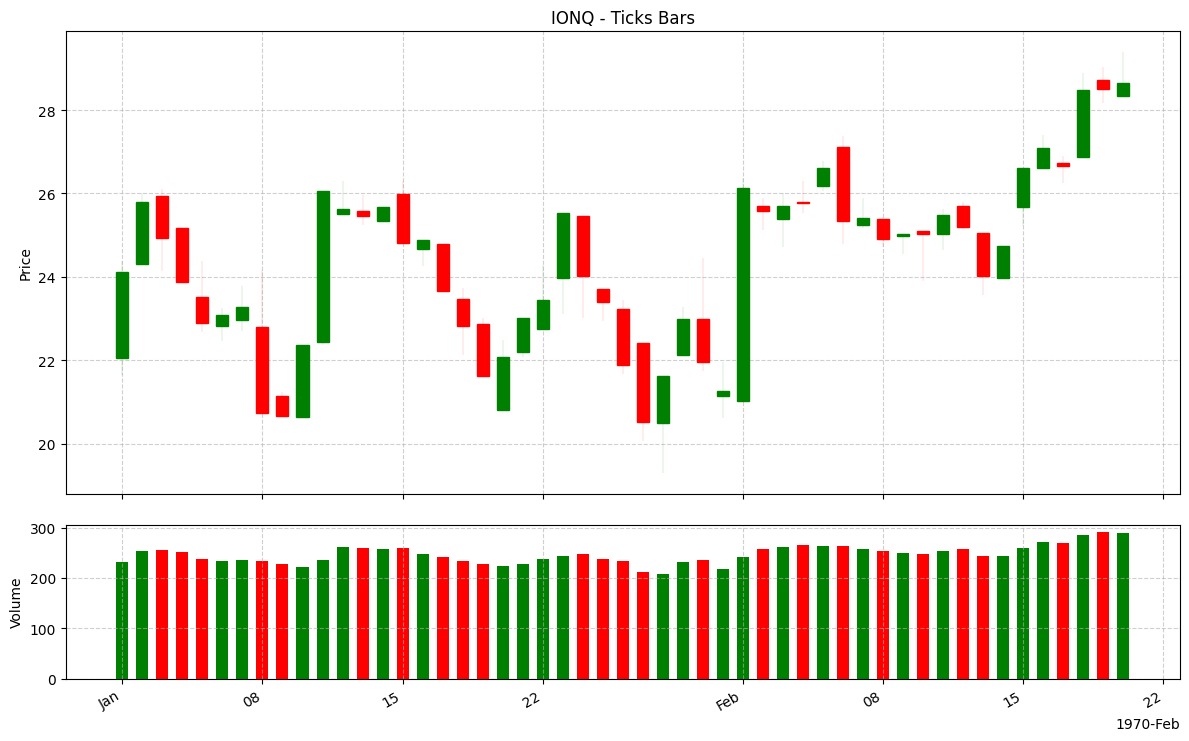

In [14]:
plot_bars_matplotlib(ticks_bar, f"Ticks Bars", ionq_tk)
plt.show()

In [15]:
dollars_bar = get_dollar_bars(data_ml,threshold=10000)

Reading data in batches:
Batch number: 0
Returning bars 



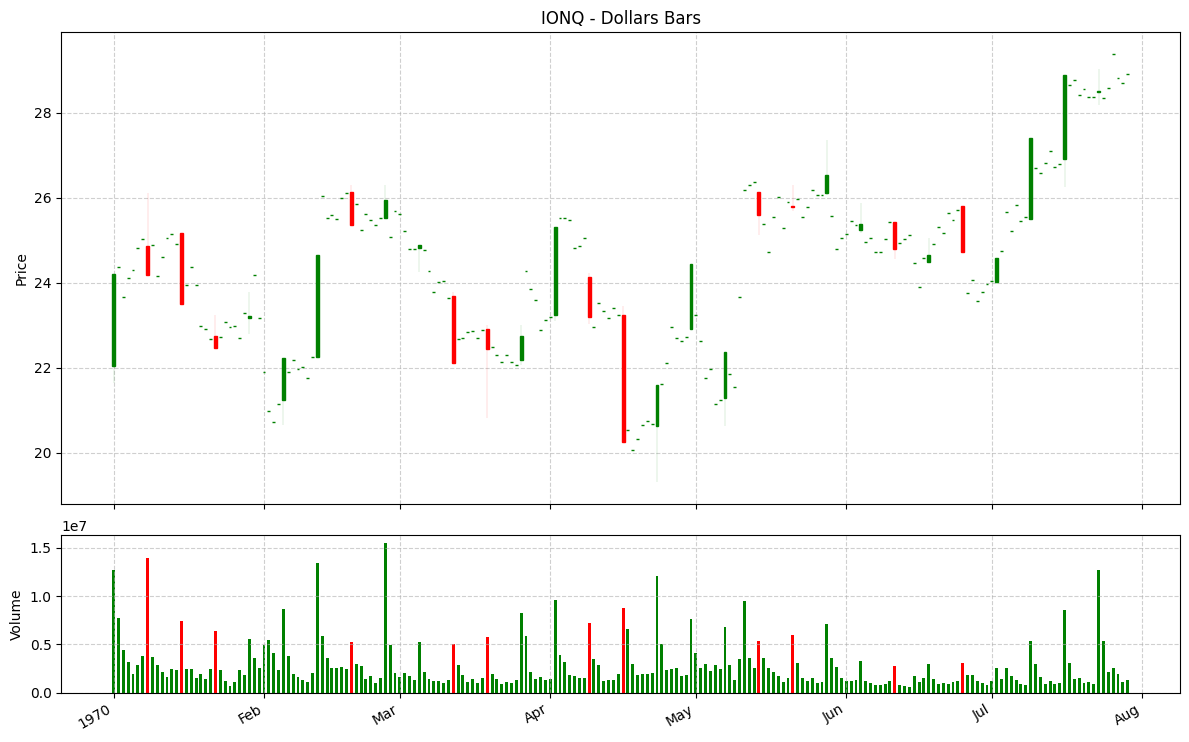

In [16]:
plot_bars_matplotlib(dollars_bar, f"Dollars Bars", ionq_tk)
plt.show()

In [17]:
from mlfinpy.filters import cusum_filter

cusum_events = cusum_filter(data_ml['Price'], threshold=0.1)

In [18]:
cusum_events

DatetimeIndex(['2025-03-14 13:30:00+00:00', '2025-03-18 13:30:00+00:00',
               '2025-03-20 16:30:00+00:00', '2025-03-24 08:00:00+00:00',
               '2025-03-24 14:30:00+00:00', '2025-03-27 16:30:00+00:00',
               '2025-03-31 10:00:00+00:00', '2025-04-01 13:00:00+00:00',
               '2025-04-02 13:30:00+00:00', '2025-04-02 22:00:00+00:00',
               '2025-04-04 11:00:00+00:00', '2025-04-04 13:30:00+00:00',
               '2025-04-07 13:30:00+00:00', '2025-04-08 12:00:00+00:00',
               '2025-04-08 16:30:00+00:00', '2025-04-09 16:30:00+00:00',
               '2025-04-09 17:30:00+00:00', '2025-04-14 13:00:00+00:00',
               '2025-04-15 16:30:00+00:00', '2025-04-22 22:00:00+00:00',
               '2025-04-25 08:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

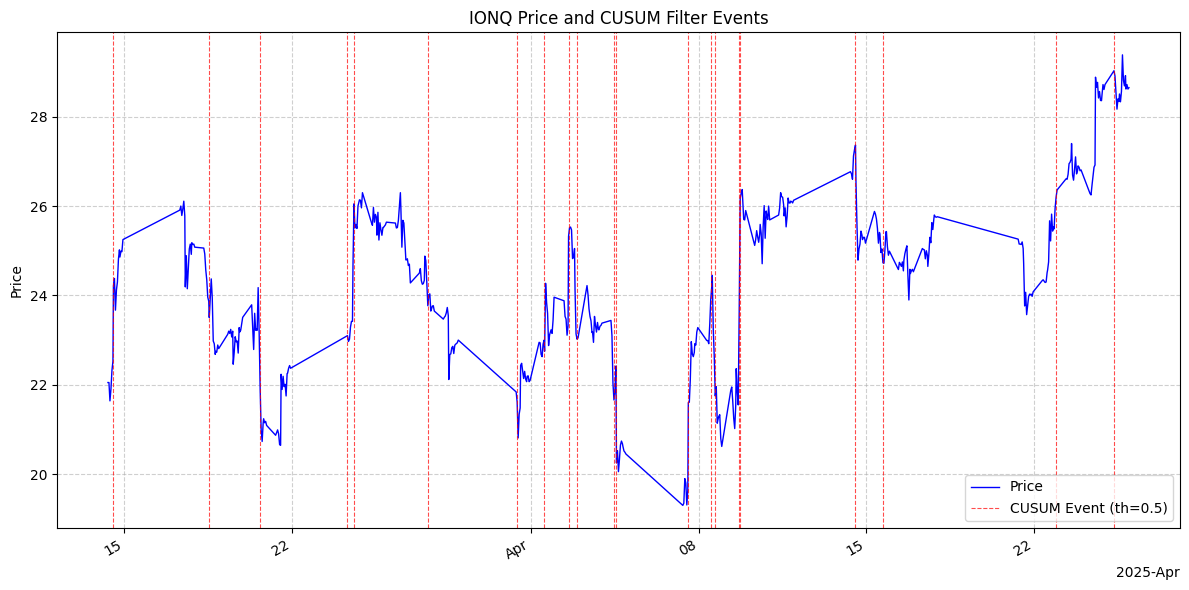

In [19]:
from plotting.utils import plot_price_with_cusum_events

plot_price_with_cusum_events(data_ml['Price'], cusum_events, ionq_tk, 0.5)
